# Prediction using supervized ML :
 Percentage of a student based on the number of hours of study

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now Lets use, graphical method to find the correlation between hours of study and marks (out of 100)

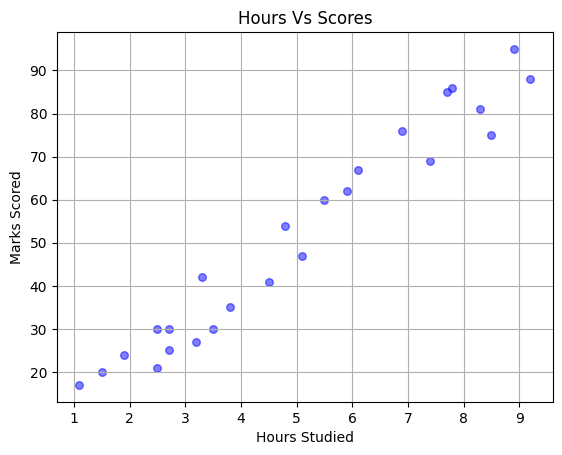

From the Graph we can infer that there is a postive linear relation betwern the hours a student studies and the scores he obtains


In [3]:
# Create a scatter plot
plt.scatter(data["Hours"], data["Scores"], c='blue', marker='o', s=30, alpha=0.5) 

# Customize the plot
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.grid(True)  # Add a grid to the plot

# Show the plot
plt.show()

print("From the Graph we can infer that there is a postive linear relation betwern the hours a student studies and the scores he obtains")

The Next step is to prepare the data for our linear regression model

In [4]:
x = data["Hours"]
y = data["Scores"]

In [5]:
# Splitting the data in test and train set

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features (X) and target (y)
X = data["Hours"]
y = data["Scores"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test data
y_pred = model.predict(X_test.values.reshape(-1, 1))

Why .values.reshape(-1, 1)?     
    The linear regression model only take 2D array as input     
    .values converts Pandas Series to NumPy array       
    .reshape(-1, 1) converts 1D array to 2D array with a single feature, suitable for scikit-learn's LinearRegression model     


In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("OLS Regression:")
print(f"  MSE: {mse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R2: {r2:.2f}")
print()


OLS Regression:
  MSE: 34.30
  MAE: 5.63
  R2: 0.67



There are three main types of linear regression: Ordinary Least Squares (OLS), Ridge Regression, and Lasso Regression.
 OLS is the simplest form of linear regression, which minimizes the sum of the squared errors between the predicted and actual values.
 Ridge Regression is a variant of OLS that adds a penalty term to the loss function to reduce overfitting.
 Lasso Regression is another variant of OLS that adds a penalty term to the loss function to reduce overfitting, 
 but it uses the L1 norm instead of the L2 norm used in Ridge Regression.

 Hyperparameters are parameters that are set before training a model, such as the learning rate, regularization strength, and number of iterations.
 Hyperparameter tuning is the process of finding the best combination of hyperparameters for a model.
 In this example, we didn't perform hyperparameter tuning because the dataset is too small, but in general, 
 it's an important step in building a machine learning model.
 
 Grid search is a common technique for hyperparameter tuning, which involves trying all possible combinations of hyperparameters 
 and evaluating the model on a validation set.
 Other techniques for hyperparameter tuning include random search, Bayesian optimization, and gradient-based optimization.


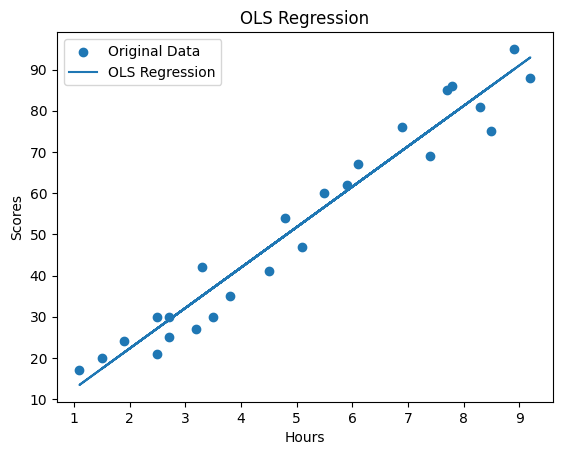

In [8]:
# Plot the original data and the predicted line
plt.scatter(X, y, label="Original Data")
plt.plot(X, model.predict(X.values.reshape(-1, 1)), label="OLS Regression")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("OLS Regression")
plt.legend()
plt.show()

In [9]:
# Create a new input array with hours=9.25
new_input = np.array([[9.25]])

# Predict the score using the trained model
predicted_score = model.predict(new_input)

print(f"Predicted score at hours=9.25: {predicted_score}")


Predicted score at hours=9.25: [93.43229054]


To extract the value from the predicted_score array, use either .item() or specify the single value with [0][0].